In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import chdir
#sns.set()
chdir('/Users/albertwakhloo/Desktop/models/neuromatch/steinmetz')
#import statsmodels

In [90]:
data_fname1 = 'steinmetz_NMA_part1.npz'
data_fname2 = 'steinmetz_NMA_part2.npz'
alldat = np.load('steinmetz_NMA_part1.npz', allow_pickle=True)['dat']
alldat = np.hstack((alldat, np.load('steinmetz_NMA_part2.npz', allow_pickle=True)['dat']))

dat = alldat[11]

In [96]:
print('Brain areas: ' + str(np.unique(dat['brain_area'])))
print('Brain regions: ' + str(dat.keys())) 
dat['spks'].shape

Brain areas: ['ACA' 'CA1' 'DG' 'LGd' 'LH' 'MD' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']
Brain regions: dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp'])


(697, 340, 250)

In [165]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
               ]

NN = len(dat['brain_area']) # number of neurons
barea = len(brain_groups) * np.ones(NN, ) # last one is "other"
for j in range(len(brain_groups)):
    barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number of each region to each neuron
    #can be used to pull out neurons wrt larger region

dim spikes = neurons x trial x time bin

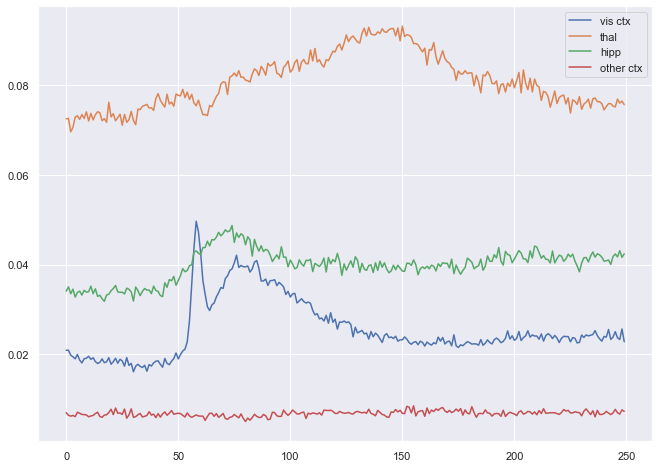

In [177]:
_, ax = plt.subplots(figsize = (11,8)) 
for j in range(len(brain_groups)) : 
    #print((dat[dat['spks'][barea == j]]))
    ax.plot(dat['spks'][barea == j].mean(axis = (0, 1)), label = regions[j])# average over neurons in region and trials 
ax.legend()
plt.show()

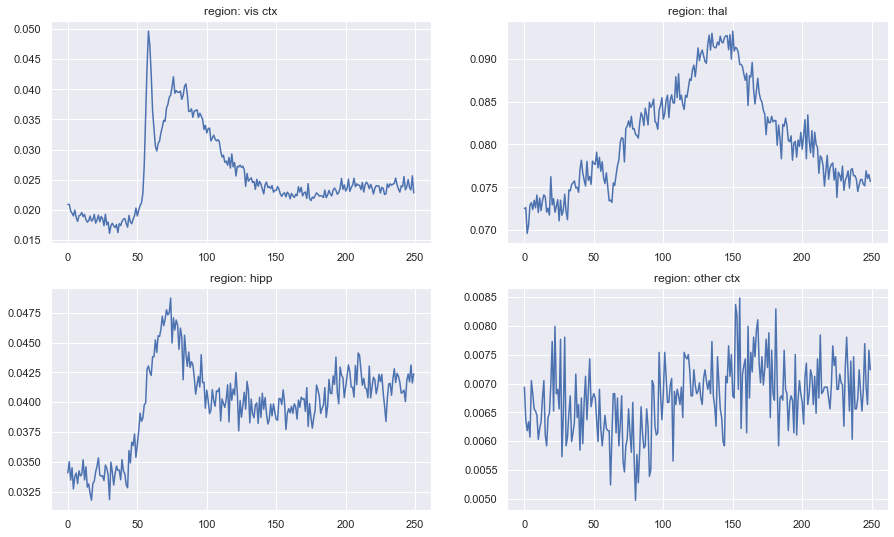

In [183]:
_, ax = plt.subplots(2, int(len(brain_groups)/2), figsize = (15,9)) 
for j, a in zip(range(len(brain_groups)), ax.flat) : 
    #print((dat[dat['spks'][barea == j]]))
    a.plot(dat['spks'][barea == j].mean(axis = (0, 1)))
    a.set_title(f'region: {regions[j]}') # average over neurons in region and trials 
plt.show()

In [189]:
np.unique(dat['bin_size'])
vis_left = dat['contrast_left']
vis_right = dat['contrast_right']

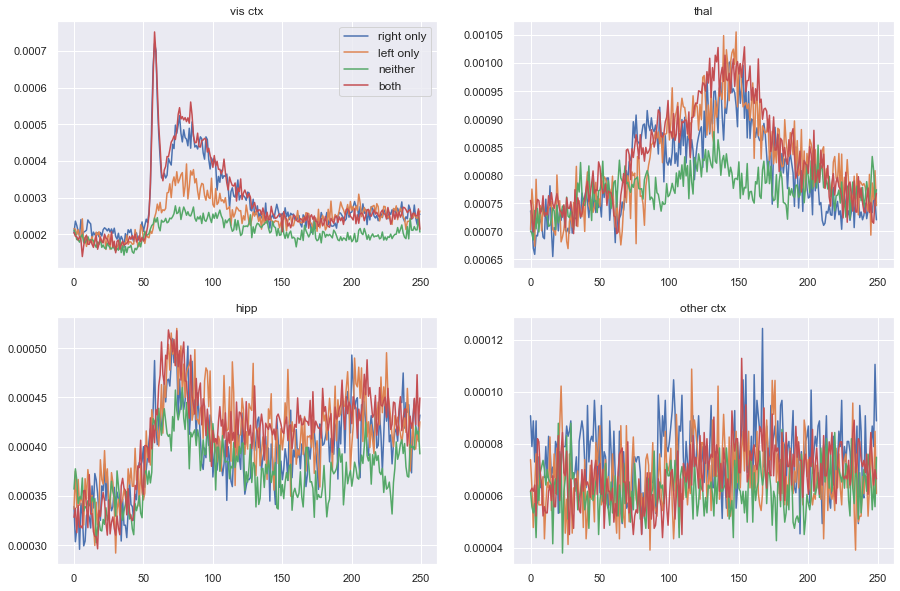

In [199]:
_, ax = plt.subplots(2, int(len(brain_groups)/2), figsize = (15,10)) 
dt = 1/0.01
for j, a in zip(range(len(brain_groups)), ax.flat) : 
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
    #a.text(.25, .92, 'n=%d'%np.sum(barea==j))#, transform=ax.transAxes)
    a.set_title(regions[j])
ax[0, 0].legend(['right only', 'left only', 'neither', 'both'], fontsize=12)

In [200]:
spikes = dat['spks']
time_mu = np.mean(spikes, axis = 1) #time averaged neural response within stimulus

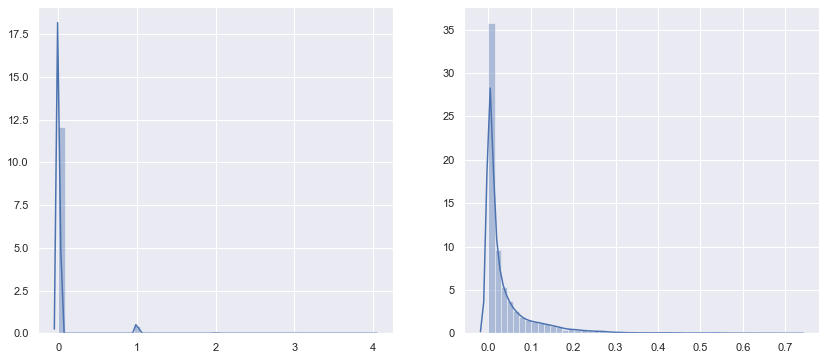

In [201]:
_, ax = plt.subplots(1,2, figsize = (14, 6))
sns.distplot(spikes[:, 0], ax = ax[0])
sns.distplot(time_mu, ax = ax[1])
plt.show()

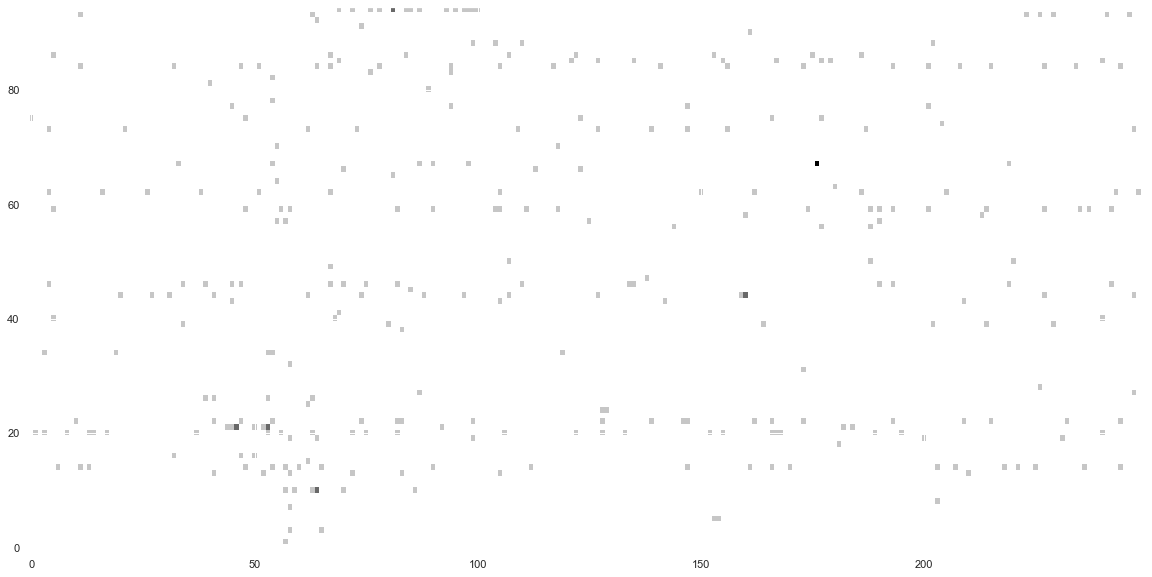

In [202]:
plt.figure(figsize = (20, 10))
Ooo = spikes[5:100, 90, :]
plt.imshow(Ooo, cmap = 'Greys', aspect = 'auto', origin = 'lower')#, lineoffsets = offsets)
plt.show()

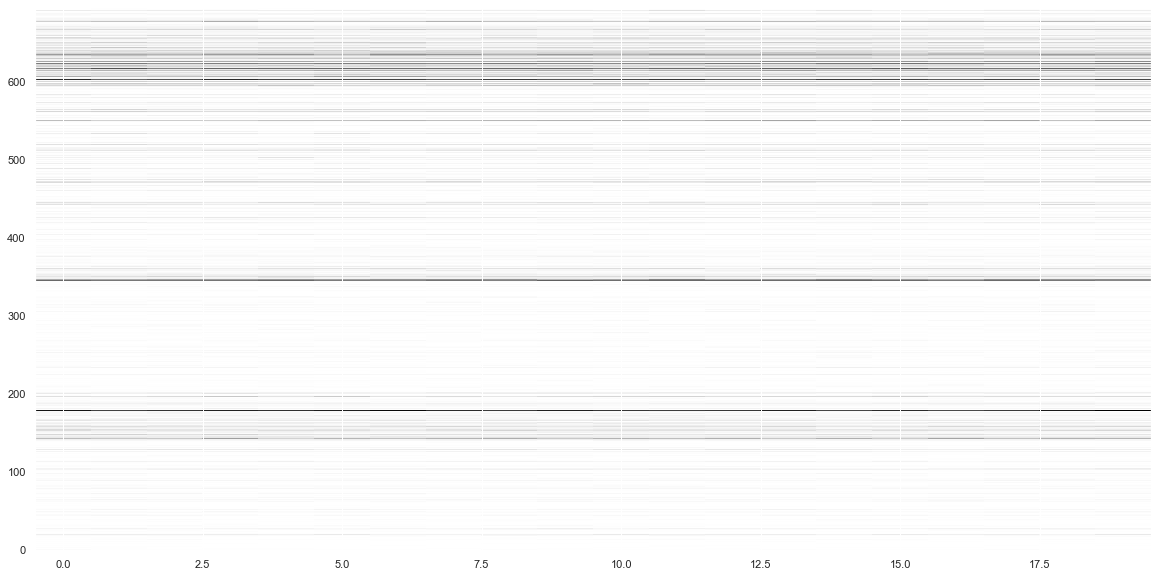

In [211]:
def raster(neuronxtime) : 
    return plt.imshow(neuronxtime, cmap = 'Greys', aspect = 'auto', origin = 'lower')
plt.figure(figsize = (20, 10))
raster(time_mu[:, 0:20])
#plt.xlim((0, 0.5))
plt.show()

In [83]:
.shape

(697, 340)

In [120]:
time_mu

array([[0.044, 0.072, 0.052, ..., 0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.004, ..., 0.   , 0.016, 0.   ],
       [0.028, 0.024, 0.032, ..., 0.056, 0.076, 0.076],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.22 , 0.236, 0.2  , ..., 0.136, 0.164, 0.112]])